# SP LIME

## Regression explainer with boston housing prices dataset

In [1]:
from sklearn.datasets import load_boston
import sklearn.ensemble
import sklearn.linear_model
import sklearn.model_selection
import numpy as np
from sklearn.metrics import r2_score
np.random.seed(1)

#load example dataset
boston = load_boston()

#print a description of the variables
print(boston.DESCR)

#train a regressor
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(boston.data, boston.target, train_size=0.80, test_size=0.20)
rf.fit(train, labels_train);

#train a linear regressor
lr = sklearn.linear_model.LinearRegression()
lr.fit(train,labels_train)

#print the R^2 score of the random forest
print("Random Forest R^2 Score: " +str(round(r2_score(rf.predict(test),labels_test),3)))
print("Linear Regression R^2 Score: " +str(round(r2_score(lr.predict(test),labels_test),3)))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
# import lime tools
import lime
import lime.lime_tabular

# generate an "explainer" object
categorical_features  = np.argwhere(np.array([len(set(boston.data[:,x])) for x in range(boston.data.shape[1])]) <= 10).flatten()
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=boston.feature_names, class_names=['price'], categorical_features=categorical_features, verbose=False, mode='regression',discretize_continuous=False)

In [3]:
#generate an explanation
i = 13
exp = explainer.explain_instance(test[i], rf.predict, num_features=14)

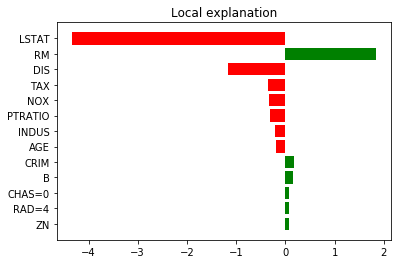

In [4]:
%matplotlib inline
fig = exp.as_pyplot_figure();

In [5]:
print("Input feature names: ")
print(boston.feature_names)
print('\n')

print("Input feature values: ")
print(test[i])
print('\n')

print("Predicted: ")
print(rf.predict(test)[i])

Input feature names: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Input feature values: 
[  4.37900000e-02   8.00000000e+01   3.37000000e+00   0.00000000e+00
   3.98000000e-01   5.78700000e+00   3.11000000e+01   6.61150000e+00
   4.00000000e+00   3.37000000e+02   1.61000000e+01   3.96900000e+02
   1.02400000e+01]


Predicted: 
20.1622


# SP-LIME pick step

### Maximize the 'coverage' function:

$c(V,W,I) = \sum_{j=1}^{d^{\prime}}{\mathbb{1}_{[\exists i \in V : W_{ij}>0]}I_j}$

$W = \text{Explanation Matrix,  } n\times d^{\prime}$

$V = \text{Set of chosen explanations}$

$I = \text{Global feature importance vector,   } I_j = \sqrt{\sum_i{|W_{ij}|}}$

In [6]:
import lime

In [7]:
import warnings
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, train, rf.predict, sample_size=20, num_features=14,num_exps_desired=5)

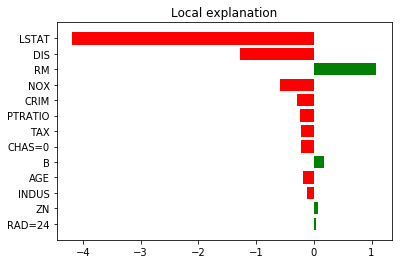

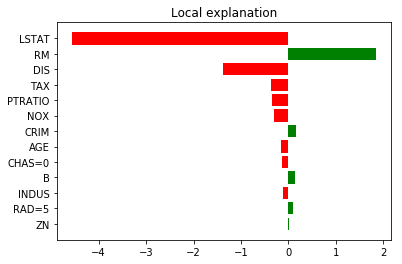

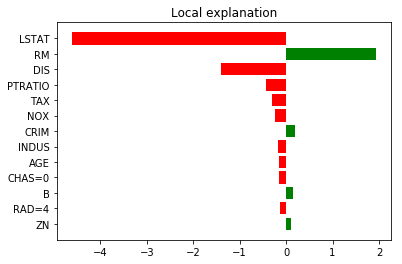

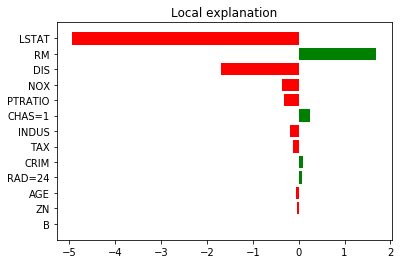

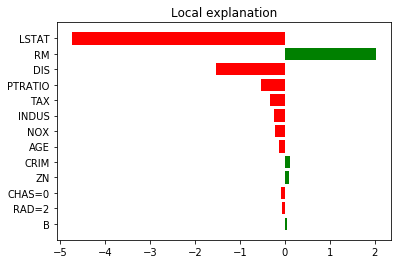

In [8]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [9]:
import pandas as pd
W=pd.DataFrame([dict(this.as_list()) for this in sp_obj.explanations])

In [10]:
W.head()

,AGE,B,CHAS=0,CHAS=1,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD=2,RAD=24,RAD=3,RAD=4,RAD=5,RAD=7,RM,TAX,ZN
0,-0.057870,-0.000680,NaN,0.248645,0.096433,-1.688421,-0.192365,-4.941001,-0.352047,-0.324941,NaN,0.065437,NaN,NaN,NaN,NaN,1.695661,-0.123172,-0.039653
1,-0.123627,0.058122,-0.079254,NaN,0.109252,-1.532825,-0.240987,-4.742649,-0.214497,-0.518830,-0.067654,NaN,NaN,NaN,NaN,NaN,2.035927,-0.323958,0.091031
2,-0.181614,0.050144,0.051142,NaN,0.021977,-1.458347,-0.115555,-4.993308,-0.500125,-0.317091,NaN,0.132283,NaN,NaN,NaN,NaN,1.391057,-0.145964,0.058307
3,-0.181754,0.031631,0.031895,NaN,0.233783,-1.145737,-0.120627,-4.401081,-0.180770,-0.414619,NaN,NaN,NaN,0.018298,NaN,NaN,2.040147,-0.292597,-0.032811
4,-0.116000,0.100807,-0.288901,NaN,0.292766,-1.612013,-0.156357,-4.790155,-0.252993,-0.400579,NaN,NaN,NaN,-0.007299,NaN,NaN,1.940067,-0.359989,0.017763


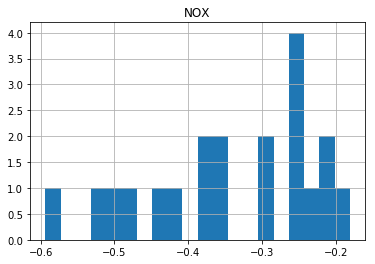

In [11]:
im=W.hist('NOX',bins=20)

## Text explainer using the newsgroups

In [12]:
# run the text explainer example notebook, up to single explanation
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
print('True class: %s' % class_names[newsgroups_test.target[idx]])

Document id: 83
Probability(christian) = 0.444
True class: atheism


In [13]:
sp_obj = submodular_pick.SubmodularPick(explainer, newsgroups_test.data, c.predict_proba, sample_size=2, num_features=6,num_exps_desired=2,top_labels=3)

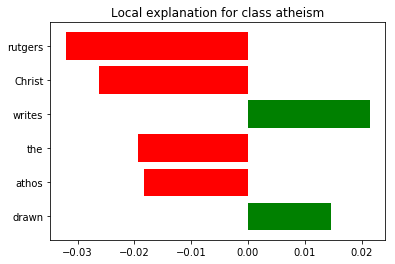

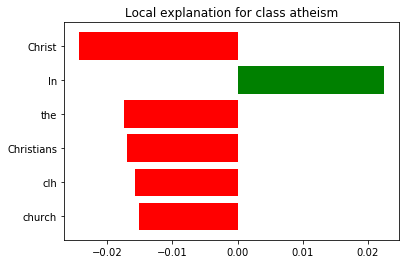

In [14]:
[exp.as_pyplot_figure(label=0) for exp in sp_obj.sp_explanations];

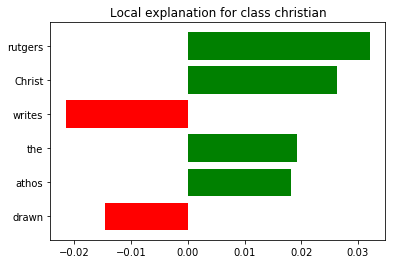

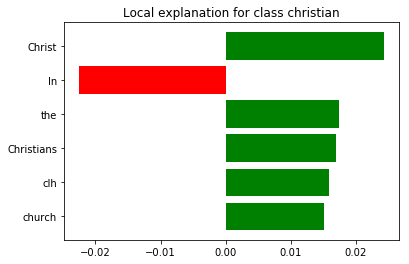

In [15]:
[exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations];

In [16]:
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,ytrain,ytest=tts(iris.data,iris.target,test_size=.2)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.83333333333333337

In [17]:
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain, 
                                                   feature_names=iris.feature_names,
                                                   class_names=iris.target_names, 
                                                   verbose=False, 
                                                   mode='classification',
                                                   discretize_continuous=False)

In [18]:
exp=explainer.explain_instance(Xtrain[i],rf.predict_proba,top_labels=3)
exp.available_labels()

[1, 2, 0]

In [19]:
sp_obj = submodular_pick.SubmodularPick(data=Xtrain,explainer=explainer,num_exps_desired=5,predict_fn=rf.predict_proba, sample_size=20, top_labels=3, num_features=4)

In [20]:
import pandas as pd
df=pd.DataFrame({})
for this_label in range(3):
    dfl=[]
    for i,exp in enumerate(sp_obj.sp_explanations):
        l=exp.as_list(label=this_label)
        l.append(("exp number",i))
        dfl.append(dict(l))
    dftest=pd.DataFrame(dfl)
    df=df.append(pd.DataFrame(dfl,index=[iris.target_names[this_label] for i in range(len(sp_obj.sp_explanations))]))
df

,exp number,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
setosa,0,-0.082228,-0.236923,-0.032294,0.012060
setosa,1,-0.090088,-0.260716,-0.025831,0.012220
setosa,2,-0.061403,-0.203016,-0.032648,0.008165
setosa,3,-0.115855,-0.326017,-0.043795,0.021527
setosa,4,-0.108132,-0.319248,-0.043905,0.014563
versicolor,0,-0.180320,0.074353,0.047606,-0.000603
versicolor,1,-0.130953,0.108325,0.049563,-0.012690
versicolor,2,-0.224952,0.035047,0.027544,-0.009744
versicolor,3,-0.009624,0.215826,0.085704,-0.021219
versicolor,4,-0.032447,0.207419,0.082044,-0.020580
